## Исследование статистических взаимосвязей между признаками
Можно использовать инструментарий модуля **stats** библиотеки **SciPy**

### Исследование количественных признаков, имеющих распределение, близкое к нормальному
Если значения анализируемых признаков $X$ и $Y$ измерены в количественной шкале, не содержат выбросов (в идеале - распределение, близкое к нормальному), то хорошей мерой линейной связи признаков может служить ***коэффициент корреляции Пирсона***.

Пусть
> $n \quad - \quad $ объем выборки;

> $x_1, x_2, ..., x_n  \quad - \quad $ значения признака $X$;

> $y_1, y_2, ..., y_n  \quad - \quad $ значения признака $Y$.

Выборочный коэффициент корреляции Пирсона вычисляется по формуле:

$$r_В = \frac{\sum_{i=1}^n(x_i-\overline x)(y_i-\overline y) }{\sqrt {\sum_{i=1}^n(x_i-\overline x)^2 \sum_{i=1}^n(y_i-\overline y)^2 } } ,$$
где
$$\overline x = \frac 1 n \sum_{i=1}^n x_i, \qquad \overline y = \frac 1 n \sum_{i=1}^n y_i. $$

Значение $r_В$ является ***оценкой*** коэффициента корреляции генеральной совокупности.

Надо иметь в виду, что  $r_В - $ случайная величина (зависит от того, какие именно объекты генеральной совокупности попали в выборку).
Вычислив значение $r_В$, необходимо решить вопрос о **значимости** выборочного коэффициента корреляции:


> если $r_В \neq 0 $, то означает ли это, что и коэффициент корреляции генеральной совокупности $r_Г $ отличен от нуля, и можно предполагать наличие линейной зависимости между признаками $X$ и $Y$?



Нулевая гипотеза $H_0 :$ $ \qquad r_Г = 0 \quad $ (корреляция отсутствует);

альтернативная гипотеза $H_1 :$ $ \qquad r_Г \neq 0 \quad  $ (корреляция существует).

Для проверки нулевой гипотезы можно использовать функцию **pearsonr()** из модуля **stats** библиотеки **Scipy**.

Функция возвращает значение выборочного коэффициента корреляции $r_В$ и величину ***p-value*** - вероятность того, что при условии справедливости нулевой гипотезы (признаки некоррелированы) по данным выборки будет получено значение коэффициента корреляции, не меньше, чем наблюдаемое значение  $r_В$.

[Документация функции](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr)

In [1]:
from scipy import stats as sts
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)
x = sts.norm(loc=1, scale=2).rvs(100)    # генерация массива, содержащего 100 псевдослучайных чисел - имитация выборки значений признака Х
# Обратите внимание: для генерации использован нормальный закон распределения

In [3]:
print(x)

[ 1.99342831e+00  7.23471398e-01  2.29537708e+00  4.04605971e+00
  5.31693251e-01  5.31726086e-01  4.15842563e+00  2.53486946e+00
  6.10512281e-02  2.08512009e+00  7.31646144e-02  6.85404929e-02
  1.48392454e+00 -2.82656049e+00 -2.44983567e+00 -1.24575058e-01
 -1.02566224e+00  1.62849467e+00 -8.16048151e-01 -1.82460740e+00
  3.93129754e+00  5.48447399e-01  1.13505641e+00 -1.84949637e+00
 -8.87654491e-02  1.22184518e+00 -1.30198715e+00  1.75139604e+00
 -2.01277380e-01  4.16612500e-01 -2.03413224e-01  4.70455637e+00
  9.73005551e-01 -1.11542186e+00  2.64508982e+00 -1.44168730e+00
  1.41772719e+00 -2.91934025e+00 -1.65637210e+00  1.39372247e+00
  2.47693316e+00  1.34273656e+00  7.68703435e-01  3.97792609e-01
 -1.95704398e+00 -4.39688417e-01  7.87224581e-02  3.11424445e+00
  1.68723658e+00 -2.52608031e+00  1.64816794e+00  2.29835439e-01
 -3.53844001e-01  2.22335258e+00  3.06199904e+00  2.86256024e+00
 -6.78435046e-01  3.81575248e-01  1.66252686e+00  2.95109025e+00
  4.16515243e-02  6.28682

Text(0.5, 1.0, 'Линейная зависимость без рассеяния')

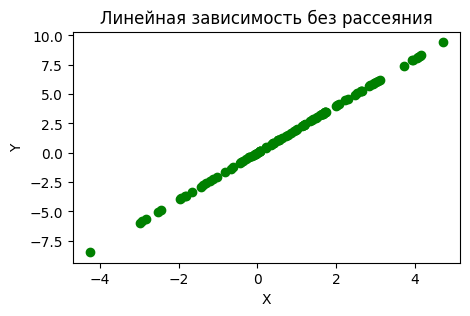

In [4]:
y0 = 2*x     # имитация строгой линейной зависимости (без рассеяния)

# Визуализация
plt.figure(figsize = (5, 3))
plt.scatter(x, y0, color = 'g')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Линейная зависимость без рассеяния')

In [5]:
# Вычисление выборочного коэффициента корреляции Пирсона и оценка его значимости
r_0 = sts.pearsonr(x, y0)
print(r_0)

PearsonRResult(statistic=1.0, pvalue=0.0)


Атрибут ***statistic*** объекта **PearsonRResult** сохраняет значение $r_В$, а атрибут ***pvalue*** - вероятность того, что при отсутствии корреляции признаков в генеральной совокупности по данным выборки будет получено значение, не меньшее, чем $r_В$.

В данном случае $r_В = 1$, а вероятность этого события при отсутствии корреляции признаков равна 0.

Доступ к отдельным компонентам объекта **PearsonRResult** ($r_В$ и **p-value** ) возможен либо по индексам, либо по именам атрибутов.

In [6]:
# По индексам
print("Значение выборочного коэффициента корреляции: ", r_0[0])
print("Значение p_value: ", r_0[1])

Значение выборочного коэффициента корреляции:  1.0
Значение p_value:  0.0


In [7]:
# По именам атрибутов
print("Значение выборочного коэффициента корреляции: ", r_0.statistic)
print("Значение p_value: ", r_0.pvalue)

Значение выборочного коэффициента корреляции:  1.0
Значение p_value:  0.0


#### Влияние рассеяния
Добавим рассеяние в значения признака $Y$ и проследим, как степень рассеяния будет влиять на величины $r_В$ и *p-value*.

Рассеяние будем имитировать добавлением к элементам массива y0 случайных нормально распределенных значений с разным средним квадратическим отклонением (с.к.о.).

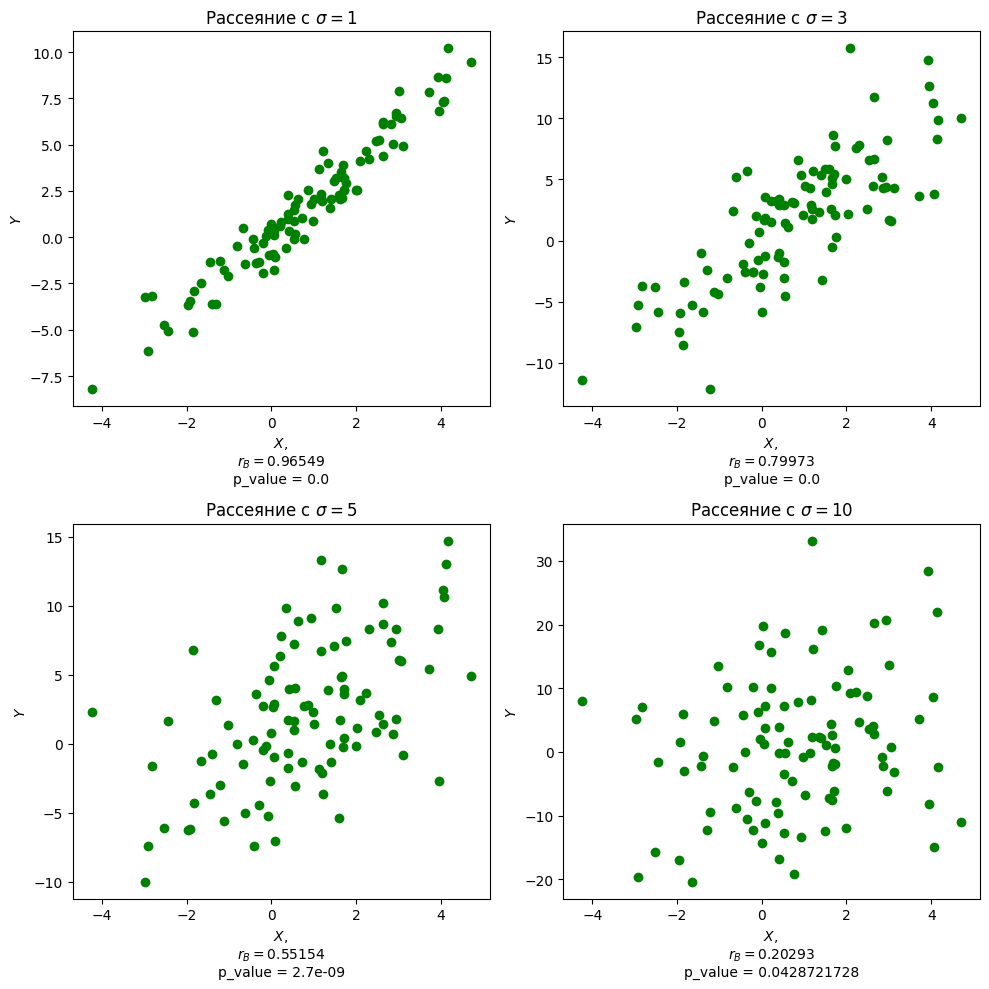

In [8]:
ys_lin = []
stds = [1, 3, 5, 10]                  # список величин с.к.о., используемых для создания рассеяния значений Y
for st in stds:                       # для каждого st - значения с.к.о. из списка stds
  dis_rv = sts.norm(scale = st)         # создаем нормально распределенную СВ со средним, равным 0 (по умолчанию), и с.к.о., равным st
  dis = dis_rv.rvs(y0.size)             # генерируем случайные отклонения от y0
  y = y0 + dis                          # имитация рассеяния: прибавляем случайные отклонения к значениям y0
  ys_lin.append(list(y))                # список значений Y с рассеянием, соотвествующим текущему st, добавляем как вложенный список в ys_lin

# Результат: "выборки" значений Y с рассеянием, соответствующим с.к.о., равным 1, 3, 5 и 10, сохранены в списке ys_lin в виде вложенных списков

# Визуализация:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
i = 0                                        # индекс в списке stds - определяет текущее значение с.к.о. и соответствующий ему вложенный список в ys_lin
for axs in axes:
  for ax in axs:
    ax.scatter(x, ys_lin[i], color = 'g')    # облако точек, соответствующее текущему значению с.к.о.
    r_v = round(sts.pearsonr(x, ys_lin[i]).statistic, 5)
    p_val = round(sts.pearsonr(x, ys_lin[i]).pvalue, 10)
    # значения r_v и p_val округляются до 5 и 10 знаков после запятой соответственно
    ax.set_xlabel('$X$, \n$r_В = $' + str(r_v) + '\np_value = ' + str(p_val))
    ax.set_ylabel('$Y$')
    ax.set_title('Рассеяние с $\sigma=%s$' % stds[i])
    i += 1
fig.tight_layout()

❓ **Упражнение**: проанализировать влияние рассеяния на величины $r_В$ и *p-value*. Сделать выводы.

#### Влияние выбросов
Создадим выброс (очень нетипичное значение) в массиве y0 и посмотрим, как это повлияет на выборочный коэффициент корреляции Пирсона.

Text(0.5, 1.0, 'Линейная зависимость с выбросом')

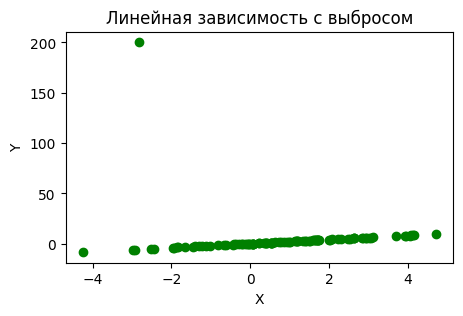

In [9]:
y0[13] = 200      # Создание выброса

# Визуализация
plt.figure(figsize = (5, 3))
plt.scatter(x, y0, color = 'g')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Линейная зависимость с выбросом')

In [10]:
# Вычисление выборочного коэффициента корреляции и оценка его значимости
r_0 = sts.pearsonr(x, y0)
print(r_0)

PearsonRResult(statistic=-0.02511774149353395, pvalue=0.804089050735088)


**!!!** Коэффициент корреляции не просто стал близок к нулю, он еще и изменил знак: вместо предполагаемой положительной связи - отрицательная!

То же самое будет наблюдаться на данных с рассеянием.

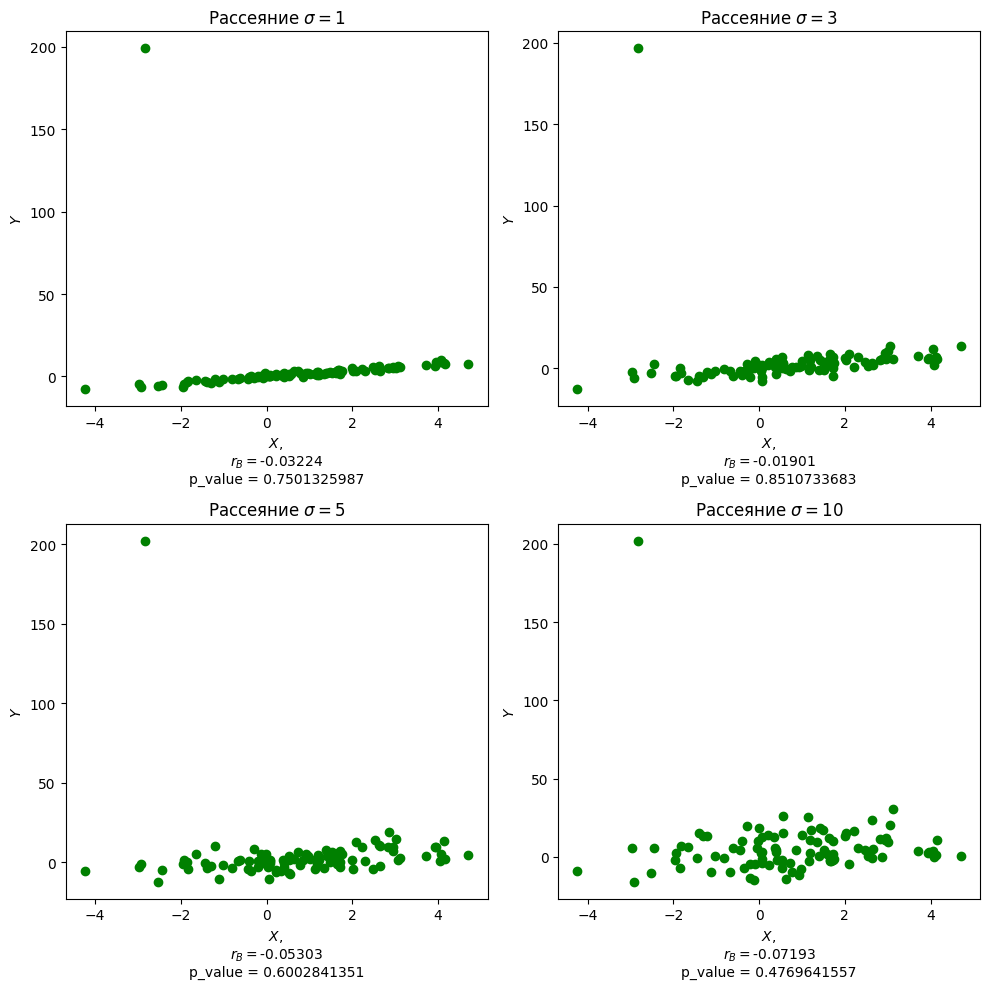

In [11]:
ys_lin_ = []
for st in stds:
  dis_rv = sts.norm(scale = st)
  dis = dis_rv.rvs(y0.size)
  y = y0 + dis
  ys_lin_.append(list(y))

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
i = 0
for axs in axes:
  for ax in axs:
    ax.scatter(x, ys_lin_[i], color = 'g')
    r_v = round(sts.pearsonr(x, ys_lin_[i]).statistic, 5)
    p_val = round(sts.pearsonr(x, ys_lin_[i]).pvalue, 10)
    ax.set_xlabel('$X$, \n$r_В = $' + str(r_v) + '\np_value = ' + str(p_val))
    ax.set_ylabel('$Y$')
    ax.set_title('Рассеяние $\sigma=%s$' % stds[i])
    i += 1
fig.tight_layout()

Полученные результаты свидетельствуют: если в анализируемых данных могут присутствовать выбросы, то следует с большой осторожностью относиться к величине коэффициента корреляции Пирсона.

В таких случаях имеет смысл использовать ***ранговую корреляцию*** (будет рассмотрена далее).

#### Выявление нелинейной зависимости
Значение выборочного коэффициента корреляции Пирсона, близкое по модулю к 1, свидетельствует о наличии зависимости, близкой к линейной (положительной или отрицательной - в зависимости от знака $r_В$).

Проследим, как отражается наличие нелинейной зависимости на величинах $r_В$ и *p-value*.

Сгенерируем два вида нелинейной зависимости $Y$ от $X$ (без рассеяния и c рассеянием).

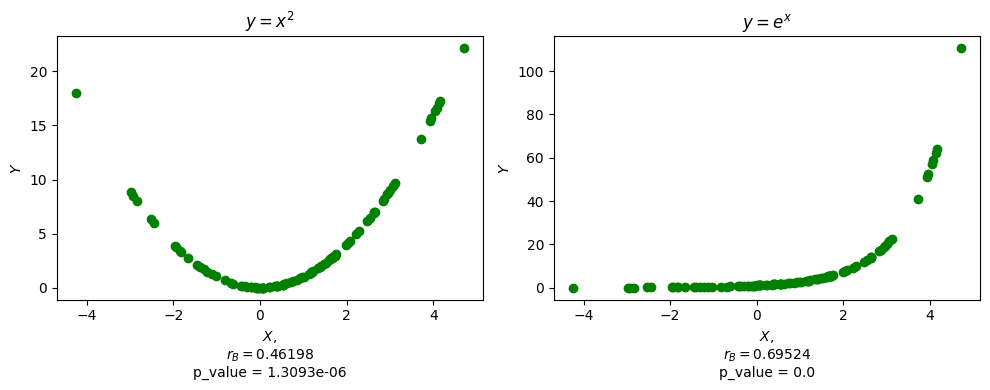

In [12]:
ys_nlin = []              # Список для сохранения всех значений Y
y = x**2                  # строгая квадратичная зависимость (без рассеяния)
ys_nlin.append(list(y))
y = np.exp(x)             # строгая экспоненциальная зависимость (без рассеяния)
ys_nlin.append(list(y))
titls = ['$y=x^2$', '$y=e^x$']

# Визуализация
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
i = 0
for ax in axes:
  ax.scatter(x, ys_nlin[i], color = 'g')
  r_v = round(sts.pearsonr(x, ys_nlin[i]).statistic, 5)
  p_val = round(sts.pearsonr(x, ys_nlin[i]).pvalue, 10)
  ax.set_xlabel('$X$, \n$r_В = $' + str(r_v) + '\np_value = ' + str(p_val))
  ax.set_ylabel('$Y$')
  ax.set_title(titls[i])
  i += 1

fig.tight_layout()

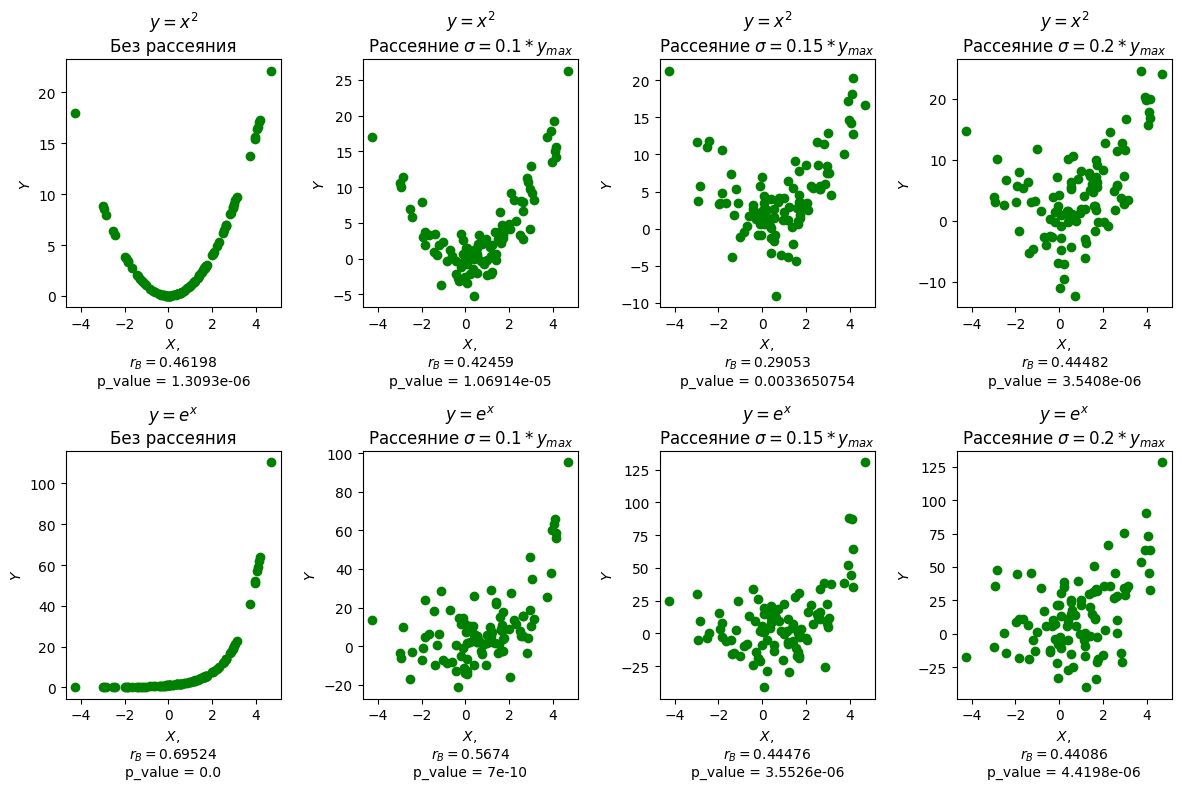

In [13]:
# Добавление рассеяния и сохранение всех данных в одном списке
ys_nlin_dis = []
stds_ = [0.1, 0.15, 0.2]
for i in range(2):
  ys_nlin_dis.append(ys_nlin[i])                     # значения Y без рассеяния
  for st in stds_:                                   # добавление значений с рассеянием
    dis_rv = sts.norm(scale = st*max(ys_nlin[i]))    # величина рассеяния соотносится со значениями Y (задается в % от максимального y) - учет разного масштаба x**2 и exp(x)
    dis = dis_rv.rvs(x.size)
    y = np.array(ys_nlin[i]) + dis
    ys_nlin_dis.append(list(y))

# Визуализация
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (12, 8))
i, j = 0, 0
for axs in axes:
  for ax in axs:
    ax.scatter(x, ys_nlin_dis[j], color = 'g')
    r_v = round(sts.pearsonr(x, ys_nlin_dis[j]).statistic, 5)
    p_val = round(sts.pearsonr(x, ys_nlin_dis[j]).pvalue, 10)
    ax.set_xlabel('$X$, \n$r_В = $' + str(r_v) + '\np_value = ' + str(p_val))
    ax.set_ylabel('$Y$')
    if (j % (len(stds_)+ 1)) != 0:
      ax.set_title(titls[i]+'\n'+'Рассеяние $\sigma=%s * y_{max}$' % stds_[(j % (len(stds_)+1)) - 1])
    else:
      ax.set_title(titls[i]+'\n'+'Без рассеяния')
    j += 1
  i += 1
fig.tight_layout()

❓ **Упражнение**: проанализировать влияние нелинейного характера зависимости и  рассеяния на величины $r_В$ и *p-value*. Сделать выводы.

### Исследование количественных признаков, имеющих распределение, отличное от нормального
Если значения анализируемых признаков $X$ и $Y$
*   измерены в порядковой шкале,
*   либо содержат выбросы,
*   либо имеют распределение, заметно отличающееся от нормального,

то следует использовать другие меры взаимосвязи - коэффициенты ***ранговой корреляции***.


Эти показатели имеют общие черты с коэффициентом корреляции Пирсона:
*   характеризуют наличие взаимосвязи, ее силу и направленность;
*   могут принимать значения в диапазоне [-1, 1].

**Отличие** от коэффициента корреляции Пирсона: вычисление ранговых коэффициентов корреляции **основано не на абсолютных значениях признаков, а на рангах**.


Пусть
> $n \quad - \quad $ объем выборки;

> $x_1, x_2, ..., x_n  \quad - \quad $ значения признака $X$;

> $y_1, y_2, ..., y_n  \quad - \quad $ значения признака $Y$.



1.   Объекты выборки следует расположить в порядке "убывания" значений признака $X$; каждому объекту приписать ранг $x_i = i$, равный порядковому номеру объекта.
2.   Объекты выборки расположить в порядке "убывания" значений признака $Y$; каждому объекту приписать ранг $y_i$, равный порядковому номеру объекта (для удобства сравнения индекс $i$ по-прежнему равен порядковому номеру объекта по признаку $X$).

Если несколько объектов имеют одно и то же значение по какому-то из признаков, то каждому из них приписывается ранг, равный среднему арифметическому порядковых номеров этих объектов.

В итоге получим 2 последовательности рангов, причем, в общем случае, $x_i \neq  y_i$.




***Коэффициент ранговой корреляции Спирмена*** вычисляется по формуле:

$$ρ = 1-\frac{6\sum_{i=1}^nd_i^2 }{n(n^2-1) } ,$$
где
$$d_i = x_i-y_i. $$

***Коэффициент ранговой корреляции Кендалла*** (тау Кендалла) вычисляется по формуле:

$$τ = \frac{4R}{n(n-1)} - 1 ,$$
где
$$R = \sum_{i=1}^{n-1}R_i , $$
$R_i \quad- \quad $число рангов, больших $y_i$.

Значения **$ρ$** и **$τ$**, так же как и $r_В$, являются статистическими оценками коэффициентов корреляции генеральной совокупности.

Вопросы о значимости выборочных коэффициентов ранговой корреляции ставятся по аналогии с вопросом о значимости выборочного коэффициента корреляции Пирсона.

Для получения ответов на эти вопросы необходима проверка статистических гипотез (по аналогии с коэффициентом корреляции Пирсона).

Для проверки гипотезы о значимости коэффициента корреляции Спирмена можно использовать функцию **spearmanr()** из модуля **stats** библиотеки **Scipy**.

Функция возвращает значение выборочного коэффициента корреляции Спирмена и величину ***p-value*** - вероятность того, что при условии справедливости нулевой гипотезы (признаки некоррелированы) по данным выборки будет получено значение коэффициента корреляции, не меньше, чем наблюдаемое значение  $ρ$.

[Документация функции](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)

Для проверки гипотезы о значимости коэффициента корреляции Кендалла можно использовать функцию **kendalltau()** из модуля **stats** библиотеки **Scipy**.

Функция возвращает значение выборочного коэффициента корреляции Кендалла и величину ***p-value*** - вероятность того, что при условии справедливости нулевой гипотезы (признаки некоррелированы) по данным выборки будет получено значение коэффициента корреляции, не меньше, чем наблюдаемое значение  $τ$.

[Документация функции](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)

Проверим чувствительность коэффициентов ранговой корреляции к наличию выбросов в данных.

Для этого повторно используем сгенерированный ранее массив y0 с выбросом.

Text(0.5, 1.0, 'Линейная зависимость с выбросом')

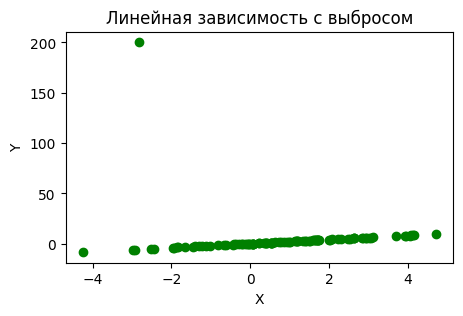

In [14]:
# Напоминание
plt.figure(figsize = (5, 3))
plt.scatter(x, y0, color = 'g')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Линейная зависимость с выбросом')

In [15]:
# Вычисление выборочного коэффициента корреляции Пирсона и оценка его значимости (напоминание)
r_0 = sts.pearsonr(x, y0)
print('Коэффициент корреляции Пирсона:', r_0[0])

# Вычисление выборочного коэффициента корреляции Спирмена и оценка его значимости
r_s = sts.spearmanr(x, y0)
print('\nКоэффициент ранговой корреляции Спирмена:', r_s[0])

# Вычисление выборочного коэффициента корреляции Кендалла и оценка его значимости
r_t = sts.kendalltau(x, y0)
print('\nКоэффициент ранговой корреляции Кендалла:', r_t[0])

Коэффициент корреляции Пирсона: -0.02511774149353395

Коэффициент ранговой корреляции Спирмена: 0.9441224122412241

Коэффициент ранговой корреляции Кендалла: 0.9612121212121214


Полученные результаты наглядно показывают, что коэффициенты ранговой корреляции намного более устойчивы к выбросам в данных, чем коэффициент корреляции Пирсона.

❓ **Упражнение**: самостоятельно изучить поведение выборочных коэффициентов ранговой корреляции при наличии нелинейных зависимостей и рассеяния в данных (можно использовать представленный выше код, внеся в него необходимые корректировки). Сделать выводы.

### Попарное исследование нескольких количественных признаков
Инструментарий библиотеки **Pandas** позволяет быстро выполнить попарное исследование взаимосвязей количественных признаков в DataFrame.

Метод **corr()** класса **DataFrame** позволяет рассчитать корреляционную матрицу для количественных признаков:
*  размерность матрицы (число строк и число столбцов) совпадает с количеством исследуемых признаков;
*   на главной диагонали - единицы (коэффициенты корреляции каждого признака с самим собой);
*   вне главной диагонали - значения коэффициентов корреляции для каждой пары признаков.

Параметр **method** функции **corr()** позволяет задать способ вычисления коэффициента корреляции (корреляция Пирсона, Спирмена или Кендалла).

[Документация функции](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

Создадим модельный набор данных (в виде DataFrame), используя сгенерированные ранее значения: массив x (выборочные значения признака X), массив y0 (линейная зависимость с выбросом), вложенные списки ys_lin (линейные зависимости с рассеянием).

In [16]:
import pandas as pd

In [17]:
d = pd.DataFrame(data = x, columns = ['X'])
d['Y0'] = y0
for i in range(len(stds)):
  d['Y_'+str(stds[i])] = ys_lin[i]

# Еще один столбец заполним случайными значениями
d['Rand'] = sts.norm(loc=2, scale=3).rvs(d.shape[0])

In [18]:
print(d)

           X        Y0       Y_1        Y_3        Y_5       Y_10      Rand
0   1.993428  3.986857  2.571486   5.060219  -0.158118 -11.957420  4.335083
1   0.723471  1.446943  1.026297   3.129296  -1.353962  -4.546807  0.346443
2   2.295377  4.590754  4.248040   7.839908   8.327222   4.643191 -0.454597
3   4.046060  8.092119  7.289842  11.253526  11.143971   8.561925  1.989877
4   0.531693  1.063387  0.902101  -3.069622   0.958879  -3.437268  1.489446
..       ...       ...       ...        ...        ...        ...       ...
95 -1.927030 -3.854060 -3.468742  -5.932789  -6.199938   1.535041 -1.029192
96  1.592241  3.184481  2.300624   5.883281  -5.381192  -7.187980  3.857463
97  1.522111  3.044221  3.197946   3.966120   9.813583   1.140834  8.172486
98  1.010227  2.020454  2.078663   4.459040   1.447755  -6.735729  2.062381
99  0.530826  1.061651 -0.081319   2.950538   7.250733 -12.766346 -0.184009

[100 rows x 7 columns]


In [19]:
# Построим корреляционную матрицу признаков, используя корреляцию Пирсона (задана по умолчанию в методе corr())
correlation_P = d.corr()
print(correlation_P)

             X        Y0       Y_1       Y_3       Y_5      Y_10      Rand
X     1.000000 -0.025118  0.965494  0.799731  0.551540  0.202935  0.021903
Y0   -0.025118  1.000000  0.037746  0.037988  0.026301  0.095005 -0.171506
Y_1   0.965494  0.037746  1.000000  0.770432  0.523421  0.240674  0.009876
Y_3   0.799731  0.037988  0.770432  1.000000  0.457768  0.113877  0.088707
Y_5   0.551540  0.026301  0.523421  0.457768  1.000000  0.271792  0.000654
Y_10  0.202935  0.095005  0.240674  0.113877  0.271792  1.000000 -0.048603
Rand  0.021903 -0.171506  0.009876  0.088707  0.000654 -0.048603  1.000000


Легко видеть, что коэффициенты корреляции между признаками
*   X и Y0,
*   X и Y_1,
*   X и Y_3,
*   X и Y_5,
*   X и Y_10

в точности такие же, какие были получены ранее при исследовании этих пар признаков по отдельности (чем меньше рассеяние относительно линейной зависимости, тем ближе коэффициент корреляции к 1; наличие выброса в столбце Y0 сильно искажает величину коэффициента).

❓ **Упражнение**: коэффициенты корреляции признаков Y_1 - Y_10 между собой также заметно отличаются от нуля. Объясните, почему это так.

Столбец Rand  был заполнен случайными значениями, поэтому коэффициенты корреляции между этим признаком и всеми остальными (кроме самого Rand) близки к 0.

In [20]:
# Построим корреляционную матрицу признаков, используя ранговую корреляцию Спирмена
correlation_S = d.corr(method = 'spearman')
print(correlation_S)

             X        Y0       Y_1       Y_3       Y_5      Y_10      Rand
X     1.000000  0.944122  0.964032  0.779622  0.529769  0.176802  0.081224
Y0    0.944122  1.000000  0.916388  0.739022  0.496622  0.202952  0.027975
Y_1   0.964032  0.916388  1.000000  0.762388  0.497174  0.210561  0.082808
Y_3   0.779622  0.739022  0.762388  1.000000  0.439544 -0.002244  0.078824
Y_5   0.529769  0.496622  0.497174  0.439544  1.000000  0.231791  0.013597
Y_10  0.176802  0.202952  0.210561 -0.002244  0.231791  1.000000 -0.029787
Rand  0.081224  0.027975  0.082808  0.078824  0.013597 -0.029787  1.000000


In [21]:
# Построим корреляционную матрицу признаков, используя ранговую корреляцию Кендалла
correlation_K = d.corr(method = 'kendall')
print(correlation_K)

             X        Y0       Y_1       Y_3       Y_5      Y_10      Rand
X     1.000000  0.961212  0.840808  0.585051  0.378586  0.121616  0.053737
Y0    0.961212  1.000000  0.807677  0.556768  0.355960  0.139394  0.018182
Y_1   0.840808  0.807677  1.000000  0.569697  0.351919  0.149899  0.060202
Y_3   0.585051  0.556768  0.569697  1.000000  0.309495 -0.010505  0.052525
Y_5   0.378586  0.355960  0.351919  0.309495  1.000000  0.162828  0.006869
Y_10  0.121616  0.139394  0.149899 -0.010505  0.162828  1.000000 -0.022222
Rand  0.053737  0.018182  0.060202  0.052525  0.006869 -0.022222  1.000000


Как и следовало ожидать:
*   коэффициенты ранговой корреляции между признаками X и Y0 стали близки к 1 (нивелировалось влияние выброса);
*   увеличилась и корреляция Y0 с остальными признаками (по той же причине);
*   изменения остальных коэффициентов не меняют общей картины.

При построении предсказательных моделей (в том числе, с помощью методов машинного обучения) на первых этапах исследования полезно проанализировать зависимости между входными признаками (входными данными, на основе которых модель будет рассчитывать прогноз) и выходными (прогнозируемыми) признаками.

В частности, необходимо выяснить, какие признаки являются значимыми (существенно влияют на величину прогнозируемого признака), а какие - малозначимыми или даже шумовыми (не влияющими на результат).
Включение малозначимых и шумовых признаков в предсказательную модель может существенно затруднить процесс обучения модели и заметно снизить качество получаемых прогнозов (в процессе обучения модель будет "настраиваться" на "шумы" в данных вместо выявления общей тенденции).

Для решения указанной задачи может быть полезен метод **corrwith()** класса **DataFrame**, который позволяет рассчитать вектор (объект Series), содержащий коэффициенты корреляции между каждым из входных и прогнозируемым признаком.
*   Число элементов вектора совпадает с количеством признаков, указанных в качестве входных;
*   элементы - коэффициенты корреляции между каждым из входных и выходным признаком.

Параметр **method** функции **corrwith()** позволяет задать способ вычисления коэффициента корреляции (корреляция Пирсона, Спирмена или Кендалла).

[Документация функции](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corrwith.html)

In [22]:
# Иллюстрация для сгенерированных ранее данных

# Исследование зависимости Y_5 (рассматривается в качестве выходного признака) от входных признаков X и Rand

x_y5_P = d[['X', 'Rand']].corrwith(d['Y_5'])                       # корреляция Пирсона
print('Корреляция Пирсона:\n', x_y5_P)

x_y5_S = d[['X', 'Rand']].corrwith(d['Y_5'], method = 'spearman')  # корреляция Спирмена
print('\nКорреляция Спирмена:\n', x_y5_S)

x_y5_K = d[['X', 'Rand']].corrwith(d['Y_5'], method = 'kendall')   # корреляция Кендалла
print('\nКорреляция Кендалла:\n', x_y5_K)

Корреляция Пирсона:
 X       0.551540
Rand    0.000654
dtype: float64

Корреляция Спирмена:
 X       0.529769
Rand    0.013597
dtype: float64

Корреляция Кендалла:
 X       0.378586
Rand    0.006869
dtype: float64


Легко видеть, что получены те же значения коэффициентов корреляции, которые были найдены ранее для этих пар признаков.

Эти значения свидетельствуют о наличии заметной зависимости между признаками X и Y_5, а также об отсутствии связи между Rand и Y_5.

Для визуализации парных зависимостей количественных признаков может быть полезен метод **scatter_matrix()** из модуля **plotting** библиотеки **Pandas**.

Метод выводит матрицу графиков:

*   на главной диагонали - гистрограммы распределения признаков;
*   вне главной диагонали - диаграммы рассеяния пар признаков.

[Документация метода](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)

Изучение гистограмм на главной диагонали позволяет получить первое представление о характере распределения каждого признака ("похожесть" на нормальное, наличие выбросов и т. п.).

Изучение диаграмм рассеяния позволяет сформировать предположения о наличии/отсутствии зависимостей между признаками, при наличии зависимости - о ее характере (линейная/нелинейная, положительная/отрицательная).

array([[<Axes: xlabel='X', ylabel='X'>, <Axes: xlabel='Y0', ylabel='X'>,
        <Axes: xlabel='Y_1', ylabel='X'>,
        <Axes: xlabel='Y_3', ylabel='X'>,
        <Axes: xlabel='Y_5', ylabel='X'>,
        <Axes: xlabel='Y_10', ylabel='X'>,
        <Axes: xlabel='Rand', ylabel='X'>],
       [<Axes: xlabel='X', ylabel='Y0'>,
        <Axes: xlabel='Y0', ylabel='Y0'>,
        <Axes: xlabel='Y_1', ylabel='Y0'>,
        <Axes: xlabel='Y_3', ylabel='Y0'>,
        <Axes: xlabel='Y_5', ylabel='Y0'>,
        <Axes: xlabel='Y_10', ylabel='Y0'>,
        <Axes: xlabel='Rand', ylabel='Y0'>],
       [<Axes: xlabel='X', ylabel='Y_1'>,
        <Axes: xlabel='Y0', ylabel='Y_1'>,
        <Axes: xlabel='Y_1', ylabel='Y_1'>,
        <Axes: xlabel='Y_3', ylabel='Y_1'>,
        <Axes: xlabel='Y_5', ylabel='Y_1'>,
        <Axes: xlabel='Y_10', ylabel='Y_1'>,
        <Axes: xlabel='Rand', ylabel='Y_1'>],
       [<Axes: xlabel='X', ylabel='Y_3'>,
        <Axes: xlabel='Y0', ylabel='Y_3'>,
        <Axes: xlabe

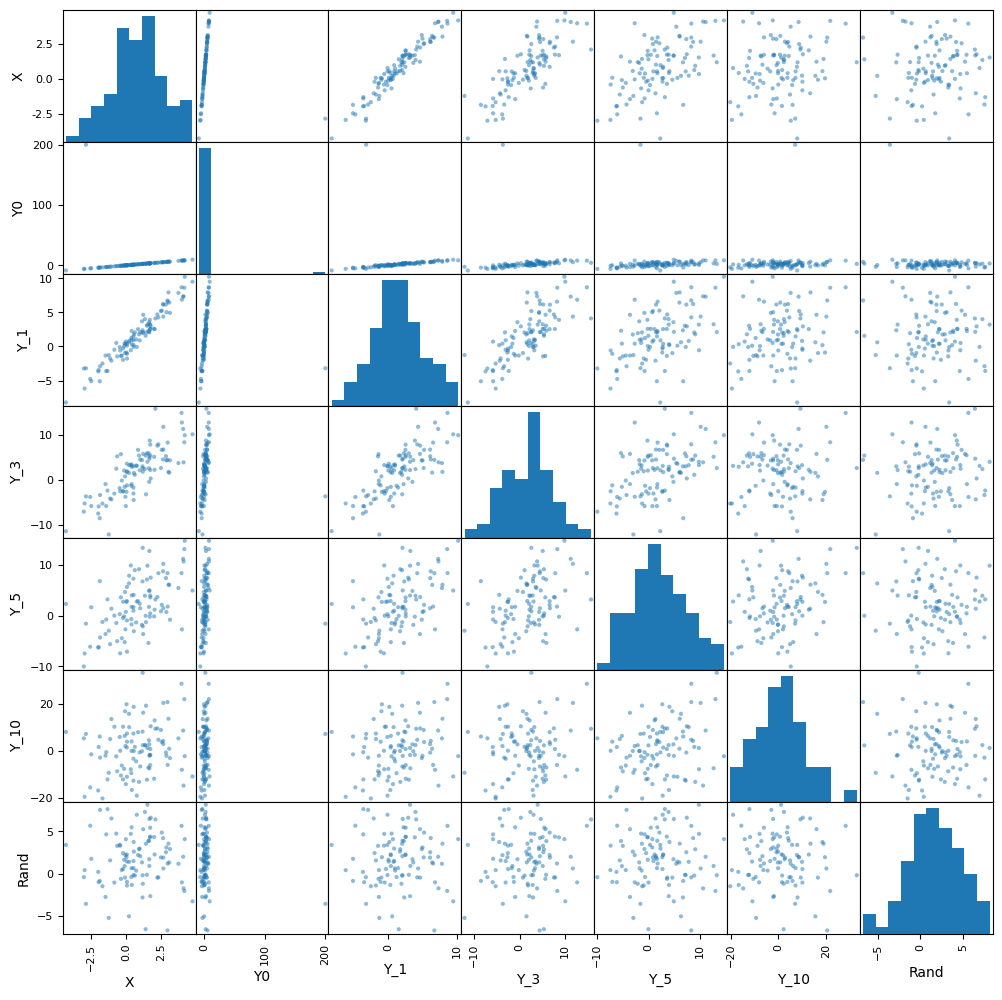

In [23]:
# Выведем scatter_matrix для сформированного набора данных d
pd.plotting.scatter_matrix(d, figsize=(12,12))

Комментарии к scatter_matrix:

*   в столбце Y0 хорошо заметен выброс (как на гистограмме, так и на диаграммах рассеяния);
*   без учета выброса можно наблюдать ярко выраженную линейную зависимость Y0 от X;
*   хорошо выражена линейная зависимость (с рассеянием) между признаками X и Y_1, X и Y_3;
*   просматривается линейная зависимость между признаками X и Y_5, хотя и со значительным рассеянием;
*   зависимость между признаками X и Y_10 достаточно слабая;
*   зависимость между Rand и остальными признаками не просматривается.





### Исследование категориальных признаков
Если значения анализируемых признаков $X$ и $Y$ измерены в качественной (номинальной) шкале, то для них недоступны не только арифметические операции, но даже упорядочивание.

Для изучения зависимостей таких признаков используются ***таблицы сопряженности***.

Пусть
> $n \quad - \quad $ объем выборки;

причем

> $x_1, x_2, ..., x_k  \quad - \quad $ различные значения признака $X$ (каждое значение может наблюдаться неоднократно);

> $y_1, y_2, ..., y_l  \quad - \quad $ различные значения признака $Y$;

> пара значений $X = x_i, Y = y_j$ наблюдается $n_{ij}$ раз.

Таблица сопряженности признаков $X$ и $Y$ имеет вид:

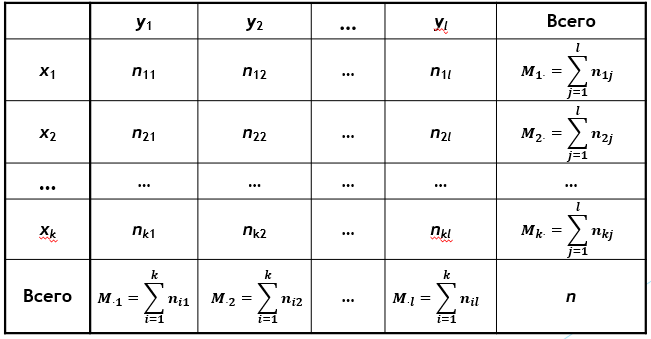

Значения $M_{i\cdot}$ в последней строке и $M_{\cdot j}$ в последнем столбце называются ***маргинальными частотами***. Они определяют одномерные распределения признаков.

Для построения таблицы сопряженности по имеющимся данным наблюдений - двух массивов (списков, объектов Series), содержащих значения признаков $X$ и $Y$, можно использовать функцию **crosstab()** библиотеки **Pandas**.

Функция возвращает объект DataFrame, содержащий таблицу сопряженности.

[Документация функции](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

Отображение (отображать или нет) маргинальных частот регулируется с помощью параметра **margins** (по умолчанию False).

Рассмотрим набор обезличенных данных клиентов некоторого банка, которые обзванивались в рамках проведения рекламной компании. Глобальная цель анализа подобного набора – построение предсказательной модели Data Mining (прогнозирование отклика клиентов на предложение банка).

В рамках данного примера мы ограничимся только анализом взаимосвязи пары категориальных признаков.

Сначала нужно импортировать набор и построить таблицу сопряженности для выбранной пары признаков.

Замечание: набор данных изначально был сформирован одним из европейских банков (клиенты - жители ЕС), и потом предобработан, поэтому значения в столбце "Образование" и др. не должны удивлять.

In [24]:
# Разделителем полей в файле является символ табуляции, а разделителем целой и дробной части числа - запятая
data = pd.read_csv('/content/Данные_клиентов.txt', sep='\t', decimal=',')
data

,ID записи,Возраст,Направление деятельности,Семейное положение,Образование,Дефолты,Ипотека,Потребительский кредит,Тип звонка,Месяц последнего контакта,...,"Продолжительность разговора, сек.",Текущее число контактов,"Последний контакт, дни",Предыдущее число контактов,Изменение уровня занятости,Индекс цен,Индекс доверия,Индекс Euribor 3m,Число сотрудников,Отклик
0,1,56,Домработница,Состоит в браке,Основное 4 года,Нет,Нет,Нет,Стационарный,май,...,261,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,Нет
1,2,57,Сфера услуг,Состоит в браке,Средняя школа,NaN,Нет,Нет,Стационарный,май,...,149,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,Нет
2,3,37,Сфера услуг,Состоит в браке,Средняя школа,Нет,Да,Нет,Стационарный,май,...,226,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,Нет
3,4,40,"Топ-менеджмент, Администрация",Состоит в браке,Основное 6 лет,Нет,Нет,Нет,Стационарный,май,...,151,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,Нет
4,5,56,Сфера услуг,Состоит в браке,Средняя школа,Нет,Нет,Да,Стационарный,май,...,307,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,Нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,41184,73,Пенсионер,Состоит в браке,Профессиональное,Нет,Да,Нет,Мобильный,ноябрь,...,334,1,NaN,0,-1.1,94.767,-50.8,1.028,4963.6,Да
41184,41185,46,Синий воротничок,Состоит в браке,Профессиональное,Нет,Нет,Нет,Мобильный,ноябрь,...,383,1,NaN,0,-1.1,94.767,-50.8,1.028,4963.6,Нет
41185,41186,56,Пенсионер,Состоит в браке,Высшее,Нет,Да,Нет,Мобильный,ноябрь,...,189,2,NaN,0,-1.1,94.767,-50.8,1.028,4963.6,Нет
41186,41187,44,Специалист,Состоит в браке,Профессиональное,Нет,Нет,Нет,Мобильный,ноябрь,...,442,1,NaN,0,-1.1,94.767,-50.8,1.028,4963.6,Да


В качестве учебного примера выясним, имеется ли взаимосвязь между направлением деятельности клиента (столбец "Направление деятельности") и уровнем его образования (столбец "Образование").

Для этого сначала необходимо построить таблицу сопряженности этих двух признаков.

In [25]:
cross_tab = pd.crosstab(data['Направление деятельности'], data['Образование'], margins=True)
cross_tab

Образование,Без образования,Высшее,Нет данных,Основное 4 года,Основное 6 лет,Основное 9 лет,Профессиональное,Средняя школа,All
Направление деятельности,,,,,,,,,
Безработный,0,262,19,112,34,186,142,259,1014
Домработница,1,139,42,474,77,94,59,174,1060
Пенсионер,3,285,98,597,75,145,241,276,1720
Предприниматель,2,610,57,137,71,210,135,234,1456
Синий воротничок,8,94,454,2318,1426,3623,453,878,9254
Специалист,0,1809,212,58,87,384,3320,873,6743
Студент,0,170,167,26,13,99,43,357,875
Сфера услуг,0,173,150,132,226,388,218,2682,3969
"Топ-менеджмент, Администрация",1,5753,249,77,151,499,363,3329,10422


Установка margins=True привела к тому, что к DataFrame добавлены строка и столбец с маргинальными частотами (строка и столбец "All").

Вообще-то, без этих столбцов можно было и обойтись, но с их помощью можно будет сделать запись необходимых вычислений немного менее громоздкой.

Суммарное количество обработанных значений (число в последней строке и последнем столбце) оказалось меньше, чем число импортированных записей. Это объясняется наличием пропусков в одном из рассматриваемых столбцов. В этом легко убедиться, запросив информацию о наборе данных.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID записи                          41188 non-null  int64  
 1   Возраст                            41188 non-null  int64  
 2   Направление деятельности           40858 non-null  object 
 3   Семейное положение                 41108 non-null  object 
 4   Образование                        41188 non-null  object 
 5   Дефолты                            32591 non-null  object 
 6   Ипотека                            40198 non-null  object 
 7   Потребительский кредит             40198 non-null  object 
 8   Тип звонка                         41188 non-null  object 
 9   Месяц последнего контакта          41188 non-null  object 
 10  День недели последнего контакта    41188 non-null  object 
 11  Результат предыдущей кампании      41188 non-null  obj

Для исследования взаимосвязи признаков $X$ и $Y$ требуется проверить нулевую гипотезу
> признаки $X$ и $Y$ не связаны зависимостью между собой

при альтернативной гипотезе

> признаки $X$ и $Y$ являются зависимыми.

Для проверки нулевой гипотезы можно использовать статистический критерий "хи-квадрат", который оценивает меру расхождения эмпирических частот ($n_{ij}$ в таблице сопряженности) и теоретических частот, вычисленных, исходя из предположения о независимости признаков $X$ и $Y$.

Ясно, что эмпирические частоты никогда не будут точно совпадать с теоретическими (хотя бы из-за ограниченности выборочных данных). Вопрос: является ли это различие значимым (может ли оно объясняться только случайными причинами, связанными с ограниченным объемом выборочных данных или свидетельствует о том, что предположение о независимости признаков было неверным)?

Обозначим:

$p_i = P(X=x_i), \quad q_j = P(Y=y_j) \;- \quad $ теоретические вероятности;

$p_i^* = \frac1n\sum_{j=1}^ln_{ij} = \frac1nM_{i\cdot},  \quad q_j^* = \frac1n\sum_{i=1}^kn_{ij} = \frac1nM_{\cdot j} \;- \quad $ статистические оценки этих вероятностей (относительные частоты).

Если признаки $X$ и $Y$ независимы, то вероятность совместного наблюдения $X=x_i$ и $Y=y_j$ равна
$$P((X=x_i)⋅(Y=y_j)) = p_i \cdot q_j ,$$
а статистическая оценка вероятности этого события:
$$p_i^*⋅q_j^* = \frac1{n^2}M_{i\cdot}\cdot M_{\cdot j} .$$

Суммарное расхождение эмпирических и теоретических частот оценивается величиной
$$\chi^2 = \sum_{i=1}^k\sum_{j=1}^l{\frac{(n_{ij} - n \cdot p_i^*⋅q_j^*)^2}{n \cdot p_i^*⋅q_j^*} } ,$$
или
$$\chi^2 = \sum_{i=1}^k\sum_{j=1}^l{\frac{(n_{ij} - \frac1nM_{i\cdot}\cdot M_{\cdot j})^2}{\frac1nM_{i\cdot}\cdot M_{\cdot j} }} .$$

Случайная величина $\chi^2$ имеет известное распределение "хи-квадрат" с параметром "число степеней свободы", равным $(k-1)(l-1)$.

Для проверки нулевой гипотезы можно использовать функцию **chisquare()** из модуля **stats** библиотеки **Scipy**.

Функция возвращает вычисленное по таблице сопряженности значение $\chi_{набл}^2$ и величину ***p-value*** - вероятность того, что при условии справедливости нулевой гипотезы (признаки независимы) по данным таблицы будет получено значение $\chi^2$, не меньше, чем $\chi_{набл}^2$.

[Документация функции](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)

На вход функции **chisquare()** необходимо подать
*   параметр **f_obs** - массив (список, объект Series), содержащий наблюдаемые частоты;
*   параметр **f_exp** - массив (список, объект Series), содержащий теоретические частоты;
*   параметр **ddof** - число связей, накладываемых на частоты; при работе с таблицей сопряженности $\; ddof = k+l-2$;
*   параметр **axis** - устанавливает измерения, к которым будет применяться расчет по критерию; при axis = None все значения f_obs обрабатываются как один набор.



Применим этот критерий к полученной ранее таблице сопряженности признаков "Направление деятельности" и "Образование".

Для этого нужно подготовить массивы с эмпирическими и теоретическими частотами.

In [27]:
# Наблюдаемые частоты - все значения из таблицы сопряженности, кроме маргинальных частот (последней строки и последнего столбца)
obs = np.array(cross_tab.iloc[:-1,:-1])
obs

array([[   0,  262,   19,  112,   34,  186,  142,  259],
       [   1,  139,   42,  474,   77,   94,   59,  174],
       [   3,  285,   98,  597,   75,  145,  241,  276],
       [   2,  610,   57,  137,   71,  210,  135,  234],
       [   8,   94,  454, 2318, 1426, 3623,  453,  878],
       [   0, 1809,  212,   58,   87,  384, 3320,  873],
       [   0,  170,  167,   26,   13,   99,   43,  357],
       [   0,  173,  150,  132,  226,  388,  218, 2682],
       [   1, 5753,  249,   77,  151,  499,  363, 3329],
       [   0, 2063,  123,  100,   85,  166,   89,  298],
       [   3,  765,   29,   93,   25,  220,  168,  118]])

In [28]:
# Для удобства последующих вычислений сохраним маргинальные частоты отдельными массивами

# последняя строка
marg_s = np.array(cross_tab.iloc[[-1],:-1])

# последний столбец
marg_c = np.array(cross_tab.iloc[:-1,[-1]])

In [29]:
print(marg_s)

[[   18 12123  1600  4124  2270  6014  5231  9478]]


In [30]:
print(marg_c)

[[ 1014]
 [ 1060]
 [ 1720]
 [ 1456]
 [ 9254]
 [ 6743]
 [  875]
 [ 3969]
 [10422]
 [ 2924]
 [ 1421]]


In [31]:
# Теоретические частоты вычисляются в предположении о независимости признаков:
# математически - произведение статистических оценок вероятностей на объем выборки,
# или (что проще) - матричное произведение массивов маргинальных частот (последний столбец на последнюю строку - в таком порядке!),
# деленное на объем выборки

exp = np.dot(marg_c, marg_s)/cross_tab.iloc[-1, -1]
exp

array([[4.46717901e-01, 3.00864506e+02, 3.97082579e+01, 1.02348035e+02,
        5.63360909e+01, 1.49253414e+02, 1.29821186e+02, 2.35221793e+02],
       [4.66983210e-01, 3.14513192e+02, 4.15096187e+01, 1.06991042e+02,
        5.88917715e+01, 1.56024279e+02, 1.35710510e+02, 2.45892604e+02],
       [7.57746341e-01, 5.10342161e+02, 6.73552303e+01, 1.73608106e+02,
        9.55602330e+01, 2.53171472e+02, 2.20209506e+02, 3.98995546e+02],
       [6.41441089e-01, 4.32010573e+02, 5.70169857e+01, 1.46961281e+02,
        8.08928484e+01, 2.14312595e+02, 1.86409907e+02, 3.37754369e+02],
       [4.07685153e+00, 2.74575951e+03, 3.62386803e+02, 9.34051985e+02,
        5.14136277e+02, 1.36212140e+03, 1.18477835e+03, 2.14668882e+03],
       [2.97062999e+00, 2.00071930e+03, 2.64055999e+02, 6.80604337e+02,
        3.74629448e+02, 9.92520486e+02, 8.63298081e+02, 1.56420172e+03],
       [3.85481423e-01, 2.59621739e+02, 3.42650154e+01, 8.83180772e+01,
        4.86134906e+01, 1.28793627e+02, 1.12025185e+02, 2.

In [32]:
ddof = obs.shape[0] + obs.shape[1] - 2
ddof

17

In [33]:
chi2_result = sts.chisquare(obs, exp, ddof, None)
print(chi2_result)

Power_divergenceResult(statistic=36206.62804416267, pvalue=0.0)


Как и следовало ожидать, расхождение между эмпирическими и теоретическими частотами получилось огромным, а вероятность того, что такое значение может наблюдаться в случае независимости признаков, практически равна нулю.

Следует сделать вывод о наличии зависимости между направлением деятельности клиента и уровнем его образования.

❓ **Упражнение**: самостоятельно изучить взаимосвязи между другими парами категориальных признаков, например: "Семейное положение" и "Направление деятельности" и др. Сделать выводы.

Величина  $\chi_{набл}^2$ сама по себе не позволяет сделать никаких выводов относительно силы связи между признаками (сильная, слабая, ...).
Для оценки силы связи необходимо соотнести это значение с объемом выборки и размерами таблицы сопряженности, на основе которых было найдено значение $\chi_{набл}^2$.

Учет указанных факторов выполняется путем вычисления ***коэффициента Крамера***:
$$V = \sqrt {\frac{\chi^2}{n \cdot min\{k-1, l-1\}} } \; ,$$
величина которого может использоваться для оценки силы связи между признаками
> от 0 при остутствии связи

> до 1 при полном совпадении.



Вычислим коэффициент Крамера для рассматриваемого примера взаимосвязи между направлением деятельности клиента и уровнем его образования.

In [34]:
chi2 = chi2_result[0]  # наблюдаемое значение хи-квадрат
V = (chi2/(cross_tab.iloc[-1, -1]*min(obs.shape[0]-1, obs.shape[1]-1)))**0.5
print("Коэффициент Крамера V =", V)

Коэффициент Крамера V = 0.355800429645571


Полученное значение говорит об умеренной (средней) связи между признаками.

**!!! Важно**.

Критерий "хи-квадрат" считается надежным только для достаточного большого набора данных, причем должно выполняться условие:
количество клеток с малочисленными наблюдениями ($n_{ij} < 5)$ не должно превышать 20% от общего числа.

В рассмотренном примере это условие было выполнено. Но не нужно про него забывать и в других исследованиях.